In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv('titanic-data.csv')

## Avaliando os dados

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Número de Amostras: {}".format(df.shape[0]))

Número de Amostras: 891


In [4]:
print("Número de Colunas: {}".format(df.shape[1]))

Número de Colunas: 12


In [5]:
print("Linhas Duplicadas: {}".format(sum(df.duplicated())))

Linhas Duplicadas: 0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
def check_types(df):
    for column in df.columns:
        print("Coluna: {0}, Tipo: {1}".format(column, type(df[column][0])))
check_types(df)

Coluna: PassengerId, Tipo: <class 'numpy.int64'>
Coluna: Survived, Tipo: <class 'numpy.int64'>
Coluna: Pclass, Tipo: <class 'numpy.int64'>
Coluna: Name, Tipo: <class 'str'>
Coluna: Sex, Tipo: <class 'str'>
Coluna: Age, Tipo: <class 'numpy.float64'>
Coluna: SibSp, Tipo: <class 'numpy.int64'>
Coluna: Parch, Tipo: <class 'numpy.int64'>
Coluna: Ticket, Tipo: <class 'str'>
Coluna: Fare, Tipo: <class 'numpy.float64'>
Coluna: Cabin, Tipo: <class 'float'>
Coluna: Embarked, Tipo: <class 'str'>


In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
df["Pclass"].unique()

array([3, 1, 2])

In [10]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
(df['Parch'] == 0).sum()

678

In [12]:
(df['SibSp'] == 0).sum()

608

In [13]:
(df['SibSp'] != 0).sum()

283

In [14]:
(df['Parch'] != 0).sum()

213

## Limpando os dados

### 1. Descartando colunas
Descartando as colunas [Cabin, Ticket, Name] porque não serão utilizadas

In [15]:
df.drop(["Cabin", "Ticket","Name"], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [16]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### 2. Renomeando colunas

Colocando todas as colunas com títulos em letras minúsculas

In [18]:
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

In [19]:
df.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Salvando um novo arquivo

In [20]:
df.to_csv('titanic-data-edited.csv', index=False)

### Filtrando, removendo nulos e duplicados

In [21]:
df.shape

(891, 9)

Descartarei as colunas [sibsp, parch] porque estão poluindo os dados, já que quase todos os valores são nulos ou estão como NaN. 
Primeiro, filtrei e descartei as linhas que tinham valores diferentes de 0. 

In [22]:
df = df.query("parch == '0'")

In [23]:
df.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [24]:
df.shape

(678, 9)

In [25]:
df = df.query("sibsp == '0'")
df.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked
2,3,1,3,female,26.0,0,0,7.9250,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
11,12,1,1,female,58.0,0,0,26.5500,S


In [26]:
df.shape

(537, 9)

In [27]:
df.isnull().sum()

passengerid      0
survived         0
pclass           0
sex              0
age            133
sibsp            0
parch            0
fare             0
embarked         2
dtype: int64

Preenchi com a média de 'age' as linhas com valor NaN, na coluna 'age'.

In [28]:
mean = df['age'].mean()

In [29]:
df['age'].fillna(mean, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 2 to 890
Data columns (total 9 columns):
passengerid    537 non-null int64
survived       537 non-null int64
pclass         537 non-null int64
sex            537 non-null object
age            537 non-null float64
sibsp          537 non-null int64
parch          537 non-null int64
fare           537 non-null float64
embarked       535 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 42.0+ KB


In [31]:
df.age = df.age.astype(int, inplace=True)
df.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked
2,3,1,3,female,26,0,0,7.9250,S
4,5,0,3,male,35,0,0,8.0500,S
5,6,0,3,male,32,0,0,8.4583,Q
6,7,0,1,male,54,0,0,51.8625,S
11,12,1,1,female,58,0,0,26.5500,S


### Droppando colunas passengerID sibsp e parch, agora que não poluirão mais os dados. 

In [46]:
df.drop(['sibsp','parch'], axis=1, inplace=True)
df.head()

,survived,pclass,sex,age,fare,embarked
2,1,3,female,26,7.9250,S
4,0,3,male,35,8.0500,S
5,0,3,male,32,8.4583,Q
6,0,1,male,54,51.8625,S
11,1,1,female,58,26.5500,S


In [40]:
df.dropna(inplace=True, how='any')
df.head()

,survived,pclass,sex,age,fare,embarked
2,1,3,female,26,7.9250,S
4,0,3,male,35,8.0500,S
5,0,3,male,32,8.4583,Q
6,0,1,male,54,51.8625,S
11,1,1,female,58,26.5500,S


In [41]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
fare        0
embarked    0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 2 to 890
Data columns (total 6 columns):
survived    535 non-null int64
pclass      535 non-null int64
sex         535 non-null object
age         535 non-null int64
fare        535 non-null float64
embarked    535 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 29.3+ KB


In [45]:
df.drop(['passengerid'], axis=1, inplace=True)
df.head()

,survived,pclass,sex,age,fare,embarked
2,1,3,female,26,7.9250,S
4,0,3,male,35,8.0500,S
5,0,3,male,32,8.4583,Q
6,0,1,male,54,51.8625,S
11,1,1,female,58,26.5500,S


In [47]:
df.to_csv('titanic-data-v2.csv', index=False)

## Análise Exploratória de Dados

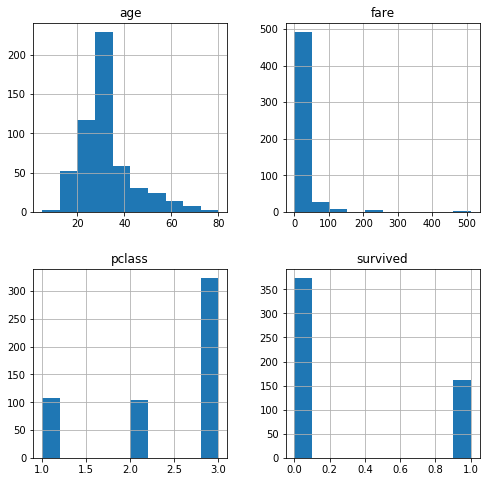

In [51]:
df.hist(figsize=(8,8));

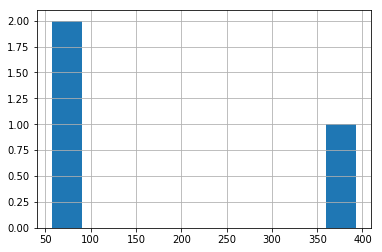

In [50]:
df['embarked'].value_counts().hist();

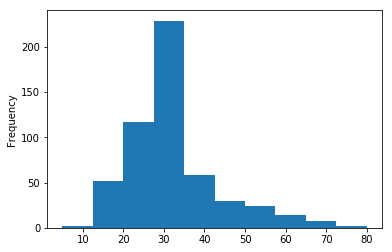

In [52]:
df['age'].plot(kind='hist');

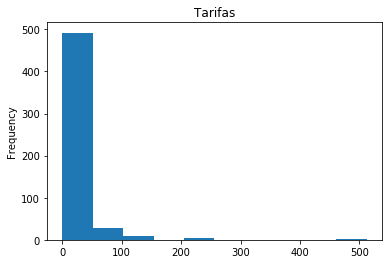

In [53]:
df['fare'].plot(kind='hist',title='Tarifas');

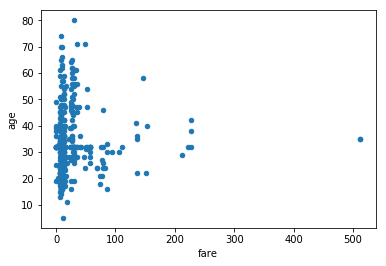

In [49]:
df.plot(kind='scatter', x='fare', y='age');

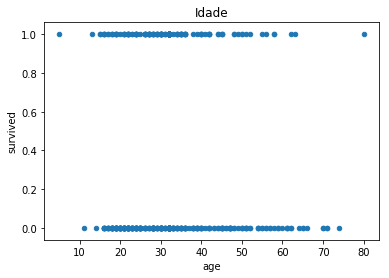

In [54]:
df.plot(kind='scatter', y='survived', x='age', title='Idade');

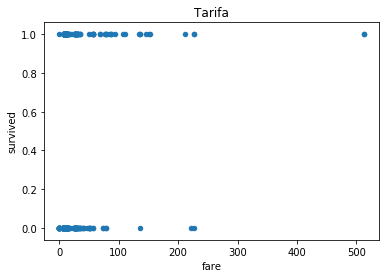

In [55]:
df.plot(kind='scatter', y='survived', x='fare', title='Tarifa');

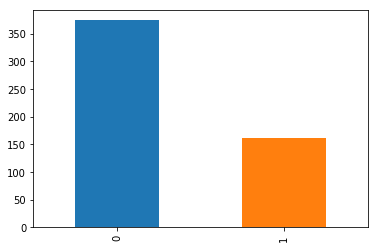

In [56]:
df['survived'].value_counts().plot(kind='bar');

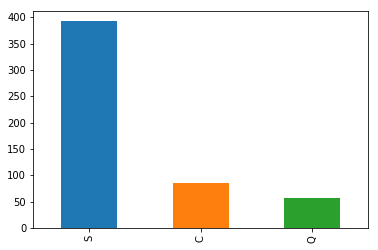

In [57]:
df['embarked'].value_counts().plot(kind='bar');

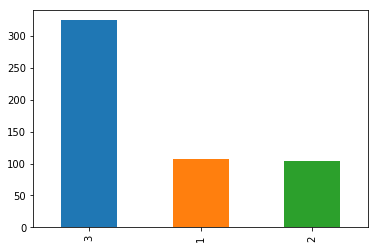

In [58]:
df['pclass'].value_counts().plot(kind='bar');

## Removendo Outliers

Um outlier é uma observação atipicamente grande ou pequena. 

Observei alguns outliers, tendo alguns em 'fare' e 'age'.

In [59]:
df['fare'].describe()

count    535.000000
mean      21.023035
std       42.148823
min        0.000000
25%        7.775000
50%        8.112500
75%       14.500000
max      512.329200
Name: fare, dtype: float64

In [60]:
i = df[(df.fare >= 500)].index
df.drop(i, inplace=True)
df['fare'].describe()

count    533.000000
mean      19.179485
std       29.535516
min        0.000000
25%        7.775000
50%        8.050000
75%       14.500000
max      227.525000
Name: fare, dtype: float64

In [61]:
df['age'].describe()

count    533.000000
mean      32.075047
std       11.143712
min        5.000000
25%       24.000000
50%       32.000000
75%       34.000000
max       80.000000
Name: age, dtype: float64

In [62]:
ii = df[(df.age >= 75)].index
df.drop(ii, inplace=True)
df['age'].describe()

count    532.000000
mean      31.984962
std       10.958222
min        5.000000
25%       24.000000
50%       32.000000
75%       34.000000
max       74.000000
Name: age, dtype: float64

In [63]:
iii = df[(df.age <= 12)].index
df.drop(iii, inplace=True)
df['age'].describe()

count    530.000000
mean      32.075472
std       10.877474
min       13.000000
25%       24.000000
50%       32.000000
75%       34.000000
max       74.000000
Name: age, dtype: float64

## Visualizando os gráficos novamente, sem outliers

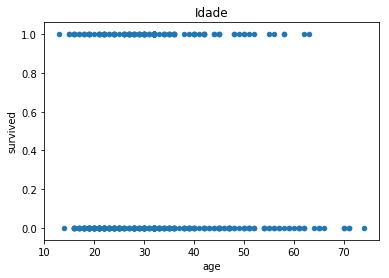

In [64]:
df.plot(kind='scatter', y='survived', x='age', title='Idade');

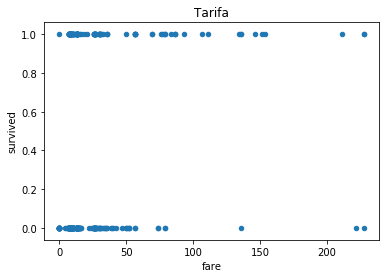

In [65]:
df.plot(kind='scatter', y='survived', x='fare', title='Tarifa');

In [66]:
df.to_csv('titanic-data-v3.csv', index=False)

## Q1: Quais as chances normais de sobrevivência?

In [67]:
df['survived'].value_counts()

0    373
1    157
Name: survived, dtype: int64

In [69]:
sobrevivente = df.query('survived == "1"').survived.count()
n_sobrevivente = df.query('survived == "0"').survived.count()
total = sobrevivente + n_sobrevivente

In [70]:
print(" Sobreviventes: {}\n Falecidos: {}\n Total de pessoas: {}".format(sobrevivente, n_sobrevivente, total))

 Sobreviventes: 157
 Falecidos: 373
 Total de pessoas: 530


## Q2: Será que os homens têm mais chances de sobreviver?

In [71]:
df2 = df.groupby(['survived', 'sex']).describe()
df2.head()

age                                                        \
                 count       mean        std   min    25%   50%    75%   max   
survived sex                                                                   
0        female   27.0  29.111111  10.081717  14.0  22.00  30.0  32.00  57.0   
         male    346.0  32.595376  11.433659  16.0  24.25  32.0  35.00  74.0   
1        female   95.0  30.736842  10.020416  13.0  24.00  32.0  33.50  63.0   
         male     62.0  32.516129   8.958450  16.0  27.00  32.0  34.75  62.0   

                  fare            ...                     pclass            \
                 count       mean ...       75%       max  count      mean   
survived sex                      ...                                        
0        female   27.0   9.630867 ...    9.7125   28.7125   27.0  2.814815   
         male    346.0  14.464664 ...   13.0000  227.5250  346.0  2.523121   
1        female   95.0  37.824168 ...   41.2521  227.5250   95.0  2.063158   
         male     62.0  21.020966 ...   29.9250   76.7292   62.0  2.145161   

                                                    
                      std  min  25%  50%  75%  max  
survived sex                                        
0        female  0.483341  1.0  3.0  3.0  3.0  3.0  
         male    0.734877  1.0  2.0  3.0  3.0  3.0  
1        female  0.835522  1.0  1.0  2.0  3.0  3.0  
         male    0.938202  1.0  1.0  3.0  3.0  3.0  

[4 rows x 24 columns]

In [72]:
print("Chances de uma mulher sobreviver: {}%".format(round((95/122)*100)))
print("Chances de um homem sobreviver: {}%".format(round((62/408)*100)))
# Dúvida: Como faria buscar a chance de uma pessoa sobreviver de maneira mais rápida? 

Chances de uma mulher sobreviver: 78%
Chances de um homem sobreviver: 15%


## Q3: Qual o valor médio da tarifa paga por sobreviventes? E por não-sobreviventes?

In [73]:
df3 = df.groupby(['survived']).describe()['fare']
df3.head()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,373.0,14.114764,20.407335,0.0,7.7500,8.05,13.0,227.525
1,157.0,31.188509,42.122640,0.0,7.8792,13.00,30.5,227.525


In [74]:
print("Valor Médio da tarifa dos sobreviventes: ${}, {}% maior.".format(31.19, 121))
print("Valor Médio da tarifa dos não-sobreviventes: ${}.".format(14.11))

Valor Médio da tarifa dos sobreviventes: $31.19, 121% maior.
Valor Médio da tarifa dos não-sobreviventes: $14.11.


In [75]:
fare_desc = df["fare"].describe()
fare_desc.head()

count    530.000000
mean      19.172458
std       29.613970
min        0.000000
25%        7.775000
Name: fare, dtype: float64

In [76]:
bin_edge = [fare_desc['min'], fare_desc['25%'], fare_desc['50%'], fare_desc['75%'], fare_desc['max']]
bin_names =  ["Baixa","Média", "Moderadamente Alta", "Alta"]
df['fare_level'] = pd.cut(df['fare'], bin_edge, labels=bin_names)
df.head()

,survived,pclass,sex,age,fare,embarked,fare_level
2,1,3,female,26,7.9250,S,Média
4,0,3,male,35,8.0500,S,Média
5,0,3,male,32,8.4583,Q,Moderadamente Alta
6,0,1,male,54,51.8625,S,Alta
11,1,1,female,58,26.5500,S,Alta


## Q4: Quanto melhor a classe, maiores as chances de sobreviver?

In [77]:
df['pclass'].unique()

array([3, 1, 2])

In [78]:
df_c1 = df[df['survived'] == 1]
df_c1.head()

,survived,pclass,sex,age,fare,embarked,fare_level
2,1,3,female,26,7.925,S,Média
11,1,1,female,58,26.550,S,Alta
15,1,2,female,55,16.000,S,Alta
17,1,2,male,32,13.000,S,Moderadamente Alta
19,1,3,female,32,7.225,C,Baixa


In [79]:
df_c1['pclass'].value_counts()

3    68
1    53
2    36
Name: pclass, dtype: int64

In [80]:
df_c0 = df[df['survived'] == 0]
df_c0.head()

,survived,pclass,sex,age,fare,embarked,fare_level
4,0,3,male,35,8.0500,S,Média
5,0,3,male,32,8.4583,Q,Moderadamente Alta
6,0,1,male,54,51.8625,S,Alta
12,0,3,male,20,8.0500,S,Média
14,0,3,female,14,7.8542,S,Média


In [81]:
df_c0['pclass'].value_counts()

3    254
2     68
1     51
Name: pclass, dtype: int64

### Porcentagem por classe dos sobreviventes

In [85]:
print("Sobreviventes: 157")
print("Primeira Classe: 33.7%")
print("Segunda Classe: 22.9%")
print("Terceira Classe: 43.4%")

Sobreviventes: 157
Primeira Classe: 33.7%
Segunda Classe: 22.9%
Terceira Classe: 43.4%


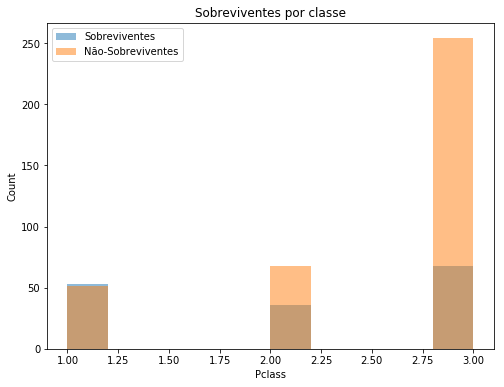

In [86]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_c1['pclass'], alpha = 0.5, label='Sobreviventes')
ax.hist(df_c0['pclass'], alpha = 0.5, label='Não-Sobreviventes')
ax.set_title('Sobreviventes por classe')
ax.set_xlabel('Pclass')
ax.set_ylabel('Count')
ax.legend(loc = 'upper left')
plt.show()

## Q5: Será que o portão de embarque influencia na sobreviência?

In [95]:
print("Sobreviventes")
df_c1['embarked'].value_counts()

Sobreviventes


S    99
C    35
Q    23
Name: embarked, dtype: int64

In [96]:
print("Não-Sobreviventes")
df_c0['embarked'].value_counts()

Não-Sobreviventes


S    292
C     47
Q     34
Name: embarked, dtype: int64

In [ ]:
print("Sobreviventes: 157")
print("S: 33.7%")
print("C: 22.9%")
print("N: 43.4%")

| Survived | S | C | Q |
|----------|---|---|---|
| 1        | 99  | 35 | 23 |
| 0        | 292 | 47 | 34 |
| Total    | 391 | 82 | 57 |

In [97]:
print("Chances de sobrevivência por portão:")
print("S: 25.31%")
print("C: 42.68%")
print("Q: 40.35%")

Chances de sobrevivência por portão:
S: 25.31%
C: 42.68%
Q: 40.35%


## Q6: Quais as características dos sobreviventes?

In [98]:
df.groupby("survived").describe()

age                                                       fare  \
          count       mean        std   min   25%   50%   75%   max  count   
survived                                                                     
0         373.0  32.343164  11.364924  14.0  24.0  32.0  35.0  74.0  373.0   
1         157.0  31.439490   9.625246  13.0  26.0  32.0  34.0  63.0  157.0   

                    ...                 pclass                                \
               mean ...    75%      max  count      mean       std  min  25%   
survived            ...                                                        
0         14.114764 ...   13.0  227.525  373.0  2.544236  0.723121  1.0  2.0   
1         31.188509 ...   30.5  227.525  157.0  2.095541  0.875474  1.0  1.0   

                         
          50%  75%  max  
survived                 
0         3.0  3.0  3.0  
1         2.0  3.0  3.0  

[2 rows x 24 columns]

In [99]:
df.corr()

,survived,pclass,age,fare
survived,1.000000,-0.257177,-0.037968,0.263494
pclass,-0.257177,1.000000,-0.328116,-0.554974
age,-0.037968,-0.328116,1.000000,0.095575
fare,0.263494,-0.554974,0.095575,1.000000
